# Project 4

## Question 1

In [1]:
import pandas as pd
import numpy as np
from numpy.random import rand

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline

sns.set(style='darkgrid')


In [2]:
df = pd.read_csv('cf_jobsdf.csv')

In [3]:
df.head()

,Unnamed: 0,Company,Title,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
0,0,PLAZA PREMIUM LOUNGE SINGAPORE PTE. LTD.,marketing manager,Full Time,Manager,Marketing / Public Relations,"$4,000to$4,500",Roles & Responsibilities Initiating and placin...,Requirements Degree holder in Marketing or any...
1,1,NTUC ENTERPRISE CO-OPERATIVE LTD,Intern / Associate Engineer (iOS),Full Time,Professional,Information Technology,"$5,000to$8,000",Roles & ResponsibilitiesNTUC Enterprise is par...,RequirementsRequirements · 3 years of ...
2,2,ACTIVANTS PTE LTD,Business Analyst,Permanent,"Professional, Senior Executive",Information Technology,"$3,500to$4,500",Roles & Responsibilities· Analyse and s...,Requirements You are required to have an attit...
3,3,CLOUDSTREAM ASIA PACIFIC PTE. LTD.,Data Scientist,Full Time,Middle Management,Information Technology,"$6,000to$12,000",Roles & Responsibilities · M.S. or Ph.D. in R...,RequirementsBASIC QUALIFICATIONS · M.S. or Ph....
4,4,ICC ACADEMY PRIVATE LTD.,Digital Marketing Manager,Full Time,Manager,Education and Training,"$3,000to$5,000",Roles & ResponsibilitiesThis is a challenging ...,Requirements-bachelor’s degree in marketing. -...


In [4]:
df.shape

(1961, 9)

In [5]:
# take a look...
df.loc[1,:]

Unnamed: 0                                                        1
Company                            NTUC ENTERPRISE CO-OPERATIVE LTD
Title                           Intern  /  Associate Engineer (iOS)
Emp_type                                                  Full Time
Seniority                                              Professional
Industry                                     Information Technology
Salary                                               $5,000to$8,000
Responsibility    Roles & ResponsibilitiesNTUC Enterprise is par...
Requirements      RequirementsRequirements   ·       3 years of ...
Name: 1, dtype: object

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True )

In [7]:
# check
df.head()

,Company,Title,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
0,PLAZA PREMIUM LOUNGE SINGAPORE PTE. LTD.,marketing manager,Full Time,Manager,Marketing / Public Relations,"$4,000to$4,500",Roles & Responsibilities Initiating and placin...,Requirements Degree holder in Marketing or any...
1,NTUC ENTERPRISE CO-OPERATIVE LTD,Intern / Associate Engineer (iOS),Full Time,Professional,Information Technology,"$5,000to$8,000",Roles & ResponsibilitiesNTUC Enterprise is par...,RequirementsRequirements · 3 years of ...
2,ACTIVANTS PTE LTD,Business Analyst,Permanent,"Professional, Senior Executive",Information Technology,"$3,500to$4,500",Roles & Responsibilities· Analyse and s...,Requirements You are required to have an attit...
3,CLOUDSTREAM ASIA PACIFIC PTE. LTD.,Data Scientist,Full Time,Middle Management,Information Technology,"$6,000to$12,000",Roles & Responsibilities · M.S. or Ph.D. in R...,RequirementsBASIC QUALIFICATIONS · M.S. or Ph....
4,ICC ACADEMY PRIVATE LTD.,Digital Marketing Manager,Full Time,Manager,Education and Training,"$3,000to$5,000",Roles & ResponsibilitiesThis is a challenging ...,Requirements-bachelor’s degree in marketing. -...


#### Duplicates and nulls

In [8]:
# drop duplicate rows
duplicates = df[df.duplicated()]

In [9]:
df.drop(duplicates.index, inplace=True)

In [10]:
# check
df.duplicated().any()

False

In [11]:
# check for nulls
df.isnull().sum()

Company             1
Title               1
Emp_type            1
Seniority          28
Industry            1
Salary            176
Responsibility      1
Requirements       54
dtype: int64

In [12]:
# removing rows with all null values
df.dropna(how='all', inplace=True)

In [13]:
# drop null rows in the following as they cannot be imputed meaningfully
df.dropna(subset = ['Seniority', 'Emp_type', 'Responsibility', 'Requirements'], inplace=True)

In [14]:
# check
df.isnull().sum()

Company             0
Title               0
Emp_type            0
Seniority           0
Industry            0
Salary            134
Responsibility      0
Requirements        0
dtype: int64

In [15]:
# to tackle salary null values when looking into the columns below

#### Title column

In [16]:
df['Title'].head(20)

0                                     marketing manager
1                   Intern  /  Associate Engineer (iOS)
2                                      Business Analyst
3                                        Data Scientist
4                             Digital Marketing Manager
5     Site Reliability Engineer (SRE) Lead, Global T...
6                         SAP SuccessFactors Consultant
7                              Scientist (WP2&3), TCOMS
8                  System Engineer - Advanced Analytics
9                               SAP SD Business Analyst
10    Senior Principal Investigator  /  Principal In...
11                                     Internal Auditor
12                                      DevOps Engineer
13             Sr Inside Software Compliance Specialist
14                                      Physiotherapist
15                                     Business Analyst
16    Temp Admin Assistant (23 Nov- 31 March, Telok ...
17                                  Logistics As

In [17]:
# there are jobs that are not data related. marketing, hr, auditors, etc.

In [18]:
# therefore decided to pull out job titles with specific labels
jobs = df[df['Title'].str.contains('Analyst|Scientist|Engineer|Data|Business Intelligence|Analytics')==True].reset_index()

In [19]:
# check
jobs.head(3)

,index,Company,Title,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
0,1,NTUC ENTERPRISE CO-OPERATIVE LTD,Intern / Associate Engineer (iOS),Full Time,Professional,Information Technology,"$5,000to$8,000",Roles & ResponsibilitiesNTUC Enterprise is par...,RequirementsRequirements · 3 years of ...
1,2,ACTIVANTS PTE LTD,Business Analyst,Permanent,"Professional, Senior Executive",Information Technology,"$3,500to$4,500",Roles & Responsibilities· Analyse and s...,Requirements You are required to have an attit...
2,3,CLOUDSTREAM ASIA PACIFIC PTE. LTD.,Data Scientist,Full Time,Middle Management,Information Technology,"$6,000to$12,000",Roles & Responsibilities · M.S. or Ph.D. in R...,RequirementsBASIC QUALIFICATIONS · M.S. or Ph....


#### Employment type column

In [20]:
# take a look
jobs['Emp_type'].value_counts()

Full Time                                                            349
Permanent                                                            187
Permanent, Full Time                                                 179
Contract, Full Time                                                  144
Contract                                                             120
Permanent, Contract, Full Time                                        14
Permanent, Contract                                                   10
Internship                                                             2
Permanent, Contract, Internship                                        1
Temporary, Contract                                                    1
Permanent, Full Time, Internship                                       1
Part Time, Permanent, Temporary, Freelance, Full Time, Internship      1
Contract, Full Time, Internship                                        1
Full Time, Internship                              

In [21]:
# to drop internships, as not meaningful for our analysis
jobs = jobs[~jobs['Emp_type'].str.contains('Internship')]

#### Responsibility column

In [22]:
# take a look at responsibility column
jobs['Responsibility'][3]

"Roles & ResponsibilitiesJPMorgan Chase & Co. (NYSE: JPM) is a leading global financial services firm with assets of $2.5 trillion and operations worldwide. The firm is a leader in investment banking, financial services for consumers and small business, commercial banking, financial transaction processing, and asset management. A component of the Dow Jones Industrial Average, JPMorgan Chase & Co. serves millions of consumers in the United States and many of the world's most prominent corporate, institutional and government clients under its J.P. Morgan and Chase brands. Information about JPMorgan Chase & Co. is available at www.jpmorganchase.com. J.P. Morgan is a place for talented people from all backgrounds and perspectives because our clients come from all backgrounds and perspectives. We encourage a culture of inclusion, where everyone's opinion counts and all employees have the freedom to deliver their absolute best. This is why we work hard and invest in attracting and developing

In [23]:
# need to remove the '\xa0' and the 'roles and responsibilities' at the beginning

In [24]:
jobs['Responsibility'] = jobs['Responsibility'].str.replace('\xa0','')

In [25]:
# to remove this from all cells in the column
jobs['Responsibility'][:5].str[:24] 

0    Roles & Responsibilities
1    Roles & Responsibilities
2    Roles & Responsibilities
3    Roles & Responsibilities
4    Roles & Responsibilities
Name: Responsibility, dtype: object

In [26]:
jobs['Responsibility'] = jobs['Responsibility'].apply(lambda x: x[24:] if type(x) is str else x)

#### Requirements column

In [27]:
# take a look at requirements column
jobs['Requirements'][0]

'RequirementsRequirements\xa0\xa0 ·\xa0\xa0\xa0\xa0\xa0\xa0 3 years of experience in iOS.\xa0\xa0 ·\xa0\xa0\xa0\xa0\xa0\xa0 Experience consuming REST APIs.\xa0\xa0 ·\xa0\xa0\xa0\xa0\xa0\xa0 Solid knowledge in GIT and CI tools.\xa0\xa0 ·\xa0\xa0\xa0\xa0\xa0\xa0 Strong OOP background.\xa0\xa0 ·\xa0\xa0\xa0\xa0\xa0\xa0 Experience working in Agile teams.\xa0\xa0 ·\xa0\xa0\xa0\xa0\xa0\xa0 Have successfully launched mobile applications.\xa0\xa0'

In [28]:
# need to remove the '\xa0' and the 'requirements' at the beginning'

In [29]:
jobs['Requirements'] = jobs['Requirements'].str.replace('\xa0','')

In [30]:
# to remove this from all cells in the column
jobs['Requirements'][:5].str[:12] 

0    Requirements
1    Requirements
2    Requirements
3    Requirements
4    Requirements
Name: Requirements, dtype: object

In [31]:
jobs['Requirements'] = jobs['Requirements'].apply(lambda x: x[12:] if type(x) is str else x)

#### Salary column

In [32]:
jobs['Salary'].head()

0     $5,000to$8,000
1     $3,500to$4,500
2    $6,000to$12,000
3    $7,500to$15,000
4     $4,500to$9,000
Name: Salary, dtype: object

In [33]:
# salaries are ranges, to take average of the two values

In [34]:
# splitting them into lists first
jobs['Salary'] = jobs['Salary'].apply(lambda x: x.replace('$', '').replace(',', '').split('to') if type(x) is str else x)

In [35]:
# check
jobs['Salary'].head()

0     [5000, 8000]
1     [3500, 4500]
2    [6000, 12000]
3    [7500, 15000]
4     [4500, 9000]
Name: Salary, dtype: object

In [36]:
# replace with average
jobs['Salary'] = jobs['Salary'].apply(lambda x: (float(x[0]) + float(x[1])) /2 if type(x) is list else x)

In [37]:
jobs['Salary'].describe()

count       945.000000
mean       9619.423810
std       17672.692492
min        1900.000000
25%        5500.000000
50%        6750.000000
75%        8750.000000
max      300000.000000
Name: Salary, dtype: float64

In [38]:
jobs['Salary'].median()

6750.0

In [39]:
# there is a large variance between min and max. probably some are annual and some are monthly

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


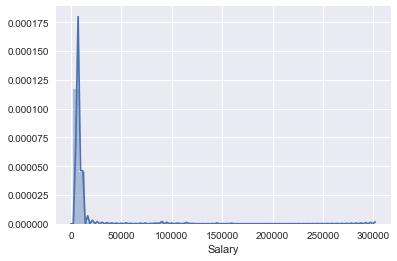

In [40]:
# taking a closer look, ignore nulls first
sns.distplot(jobs['Salary'].dropna())

In [41]:
# seems that above 30,000 it doesn't follow the distribution anymore
# to assume that those above 25,000 are annual salaries
# therefore to divide these figures by 12

In [42]:
jobs.loc[jobs['Salary'] > 25000, 'Salary'] /= 12

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


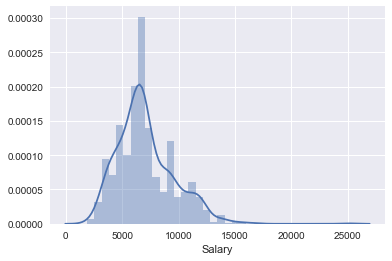

In [43]:
# check
sns.distplot(jobs['Salary'].dropna())
# seems to make more sense now

In [44]:
# dealing with the null values

In [45]:
jobs[jobs['Salary'].isnull()]

,index,Company,Title,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
16,36,CROWN EQUIPMENT (SINGAPORE) PTE. LTD.,"Key Account Data Analyst, SEA",Full Time,Professional,Others,NaN,"Provide key data to ensure that our customer, ...","Knowledge, Skills & Experience - Excellent wri..."
20,43,BLUECHIP PLATFORMS ASIA PTE. LTD.,Market Risk Analyst Oil & Gas,Full Time,Senior Executive,"Risk Management, Banking and Finance",NaN,Our client is listed on the stock exchange in ...,**Apply here** https://www.bluechipcareers-asi...
31,62,Company Undisclosed,Data Scientist,Full Time,Professional,Information Technology,NaN,​Our Client is an established company in Singa...,Ph.D. or Master’s Degree in operations resear...
51,104,ANOTECH ENERGY SINGAPORE PTE. LTD.,Business Analyst (CIB),"Contract, Full Time",Executive,Information Technology,NaN,An exciting opportunity with one of our client...,Qualifications and Profile This position requi...
63,127,RESORTS WORLD AT SENTOSA PTE. LTD.,"IT Business Analyst, Data Technology",Permanent,Manager,Information Technology,NaN,"Gather, analyze and assess business requireme...","Degree in Computer Science, Engineering, Info..."
77,153,SBS TRANSIT LTD,"Engineer, Rolling Stock (Engineering Train Unit)","Permanent, Full Time",Executive,Engineering,NaN,"Responsible for managing, planning and execut...",Degree in Electrical & / or Electronics / Mec...
107,206,SURBANA JURONG CONSULTANTS PTE. LTD.,Human Resource System Data Analyst,"Permanent, Full Time",Executive,"Human Resources , Information Technology",NaN,Role Summary The incumbent must be a technical...,"Requirements: Possess at least a Diploma, Adv..."
116,218,Company Undisclosed,Data Scientist,"Permanent, Full Time",Professional,Information Technology,NaN,IN THIS POSITION YOU WILL: Work closely with ...,KEY REQUIREMENTS: MS or PhD in Computer Scien...
130,241,SINGAPORE HEALTH SERVICES PTE LTD,"Manager, Data Science",Full Time,Manager,Others,NaN,The Office for Insights and Analytics spearhea...,"PhD, Masters or Bachelors in quantitative dis..."
143,270,Company Undisclosed,Senior Manager / Manager(Data policy & Research),Permanent,Manager,"Admin / Secretarial, Others, Public / Civil Se...",NaN,"Formulate and review policy positions, framew...",Masters or good bachelor’s degree in any rele...


In [46]:
# take a look at lower end of the salaries
jobs['Salary'].value_counts().sort_index().head(10)

1900.0    1
1950.0    1
2400.0    1
2500.0    1
2650.0    1
2700.0    1
2750.0    2
2800.0    1
2900.0    2
3000.0    5
Name: Salary, dtype: int64

In [47]:
# <2000 seems a bit low. to investigate. suggest to drop salaries below <2000, not sure if its a short term contract

In [48]:
jobs[jobs['Salary']  <2000]

,index,Company,Title,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
227,434,THE SUPREME HR ADVISORY PTE. LTD.,L1 Desktop Engineer - Scotts Road - OS Backup ...,Full Time,Senior Executive,Information Technology,1950.0,location: Scotts Road,MAIN ROLES AND RESPONSIBILITIES • OS Backup & ...
770,1501,MACHSPEED HUMAN RESOURCES PTE. LTD.,"Engineering Assistant-QA (S$1800-2000+OT, Day ...",Permanent,Non-executive,Engineering,1900.0,"Engineering Assistant-QA (S$1800-2000+OT, Day ...","Requirements Minimum Diploma in Mechanical, E..."


In [49]:
# does not seem related to the data science field. suggest to drop

In [50]:
jobs.drop([227,770], inplace=True)

In [51]:
# tackle the null values now
# to impute null values with medians, based on seniority

In [52]:
# create a 'lookup table'
median_sal = jobs.groupby('Seniority')['Salary'].median()
median_sal_df = median_sal.to_frame()

In [53]:
median_sal_df.head()

,Salary
Seniority,
Executive,6000.0
"Executive, Junior Executive",3375.0
"Executive, Junior Executive, Senior Executive",5525.0
"Executive, Non-executive",4400.0
"Executive, Senior Executive",5250.0


In [54]:
jobs.loc[jobs['Salary'].isnull(),'Salary'] = jobs['Seniority'].map(median_sal_df['Salary'])


In [55]:
jobs.isnull().sum().sum()

1

In [56]:
# pull out remaining
jobs[jobs['Salary'].isnull()]

,index,Company,Title,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
913,1784,ARCSTONE PTE. LTD.,Manufacturing Data Specialist,Full Time,"Professional, Junior Executive, Senior Executive","Consulting , Engineering, Information Technolo...",NaN,Why Arcstone? Arcstone is a fast-growing start...,What are the requirements of the job? BA/BS f...


In [57]:
# to drop remaining null record
jobs.drop(913, inplace=True)

In [58]:
# for modelling purposes, split into salary bands (high vs low)

In [59]:
jobs['Salary'].describe()

count     1001.000000
mean      7062.434732
std       2468.510759
min       2400.000000
25%       5500.000000
50%       6750.000000
75%       8400.000000
max      25000.000000
Name: Salary, dtype: float64

In [60]:
jobs['Salary'].median()

6750.0

Performed some research to determined Singapore's average salary, to find the benchmark to split our data into higher and lower bands. Research is for entry level. 

https://www.payscale.com/research/SG/Job=Data_Scientist/Salary/5e2beebd/Entry-Level-Singapore

Average salary = 5802/mth 

Therefore, as our data has senior positions, the median does not seem too far off from research data. Hence, to divide the salaries using the median.

Higher = >6750/mth

Lower = <6750/mth

In [61]:
# splitting into higher and lower bands
jobs['sal_band'] = jobs['Salary'].apply(lambda x: 'lower band' if x <= 6750  else 'higher band')

In [62]:
jobs['sal_band'].value_counts()

lower band     561
higher band    440
Name: sal_band, dtype: int64

#### Visualizing our cleaned data

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


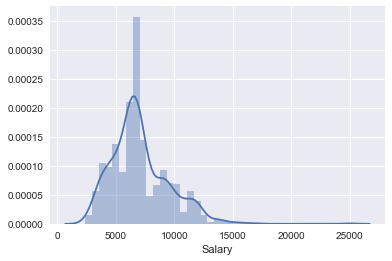

In [63]:
sns.distplot(jobs['Salary'])

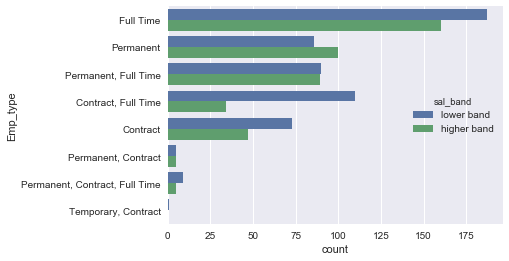

In [64]:
sns.countplot(y='Emp_type', hue='sal_band', data=jobs)

#### Creating dummies for salary band column

In [65]:
dummies = pd.get_dummies(jobs['sal_band'])

In [66]:
dummies.head()

,higher band,lower band
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [67]:
# append higher band column to jobs df
jobs['higher band'] = dummies['higher band']

In [68]:
# check
jobs.head()

,index,Company,Title,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements,sal_band,higher band
0,1,NTUC ENTERPRISE CO-OPERATIVE LTD,Intern / Associate Engineer (iOS),Full Time,Professional,Information Technology,6500.0,NTUC Enterprise is part of NTUC’s Group of Soc...,Requirements · 3 years of experience in iOS. ·...,lower band,0
1,2,ACTIVANTS PTE LTD,Business Analyst,Permanent,"Professional, Senior Executive",Information Technology,4000.0,· Analyse and synthesize information provided ...,You are required to have an attitude of conti...,lower band,0
2,3,CLOUDSTREAM ASIA PACIFIC PTE. LTD.,Data Scientist,Full Time,Middle Management,Information Technology,9000.0,"· M.S. or Ph.D. in Research, Computer Science...",BASIC QUALIFICATIONS · M.S. or Ph.D. in Resear...,higher band,1
3,5,"JPMORGAN CHASE BANK, N.A.","Site Reliability Engineer (SRE) Lead, Global T...","Permanent, Full Time",Senior Executive,Information Technology,11250.0,JPMorgan Chase & Co. (NYSE: JPM) is a leading ...,This role requires a wide variety of strengths...,higher band,1
4,7,"TECHNOLOGY CENTRE FOR OFFSHORE AND MARINE, SIN...","Scientist (WP2&3), TCOMS","Contract, Full Time",Non-executive,Sciences / Laboratory / R&D,6750.0,About Technology Centre for Offshore and Marin...,A Masters/Ph.D. from reputable universities i...,lower band,0


In [69]:
# drop sal band column
jobs.drop('sal_band', axis=1, inplace=True)

In [70]:
jobs.dtypes

index               int64
Company            object
Title              object
Emp_type           object
Seniority          object
Industry           object
Salary            float64
Responsibility     object
Requirements       object
higher band         uint8
dtype: object

### Prepare data for nlp for feature selection

i. Title

ii. Seniority

iii. Responsibilities

iv. Requirements

In [71]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from itertools import cycle
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.svm import SVC
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words
from sklearn.naive_bayes import MultinomialNB
import re

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [72]:
# combining all the job information into 1 column for NLP
jobs['all']= jobs['Company'] + ' ' + jobs['Title'] + ' ' + jobs['Emp_type'] + ' ' + jobs['Seniority'] + ' ' + jobs['Industry'] + ' ' + jobs['Responsibility'] + ' ' + jobs['Requirements']


In [73]:
# check if need to add additional words into stopwords

In [74]:
# need to stem/lemmatize? hmm...

In [75]:
# try with all features first
y = jobs['higher band']
X = jobs['all']

In [76]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [77]:
X_train.shape

(750,)

### Modelling (Round 1)

In [125]:
# CountVectorizer
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

print(X_train_dtm.shape)

(750, 89007)


#### Model_1: KNN

In [126]:
# try KNN 
knn = KNeighborsClassifier()
cross_val_knn = cross_val_score(knn, X_train_dtm, y_train, cv=5)

print ('Cross Val Score: ', np.mean(cross_val_knn))


knn.fit(X_train_dtm, y_train)

pred_knn = knn.predict(X_test_dtm)
print ('Score: ', knn.score(X_test_dtm, y_test), '\n')
print ('Classification Report: \n', classification_report(y_test, pred_knn))

Cross Val Score:  0.5772913166511104
Score:  0.601593625498008 

Classification Report: 
              precision    recall  f1-score   support

          0       0.66      0.63      0.64       143
          1       0.54      0.56      0.55       108

avg / total       0.60      0.60      0.60       251



#### Model_2: Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
cross_val_logreg = cross_val_score(logreg, X_train_dtm, y_train, cv=5)
print ('Cross Val Score: ', np.mean(cross_val_logreg))

pred_logreg = pd.DataFrame(logreg.predict(X_test_dtm))  
probs = pd.DataFrame(logreg.predict_proba(X_test_dtm))
print("Score:", logreg.score(X_test_dtm, y_test))
print('Classification Report: \n', classification_report(y_test, pred_logreg))


Cross Val Score:  0.746667318547491
Score: 0.7131474103585658
Classification Report: 
              precision    recall  f1-score   support

          0       0.74      0.76      0.75       143
          1       0.67      0.66      0.66       108

avg / total       0.71      0.71      0.71       251



#### Model_3: Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier()  

rfm = rf.fit(X_train_dtm, y_train)  

pred_rf = pd.DataFrame(rfm.predict(X_test_dtm))  
probs = pd.DataFrame(rfm.predict_proba(X_test_dtm))

rf_accuracy = accuracy_score(y_test, pred_rf)  
print("Score:",rf_accuracy)
print(classification_report(y_test, pred_rf))

Score: 0.6972111553784861
             precision    recall  f1-score   support

          0       0.68      0.89      0.77       143
          1       0.75      0.44      0.56       108

avg / total       0.71      0.70      0.68       251



#### Findings so far:
    
Logistic regression giving the highest score so far. 
However, model was performed without feature selection.
To perform experiment with some of the features and perform modelling again to see if there is any improvement.
As the responsibility and requirements columns have the most information, and intuitively should be the most useful features, to try round 2 of modelling with these 2 columns.

### Modelling (Round 2)

In [129]:
# join into one 
jobs['all2'] = jobs['Responsibility'] + ' ' + jobs ['Requirements']

In [130]:
y2 = jobs['higher band']
X2 = jobs['all2']

In [131]:
# split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [132]:
# CountVectorizer
vect = CountVectorizer(ngram_range=(1, 2))
X2_train_dtm = vect.fit_transform(X2_train)
X2_test_dtm = vect.transform(X2_test)

print(X2_train_dtm.shape)

(750, 89698)


#### Model_1: KNN

In [133]:
# try KNN 
knn = KNeighborsClassifier()
cross_val_knn = cross_val_score(knn, X2_train_dtm, y2_train, cv=5)

print ('Cross Val Score: ', np.mean(cross_val_knn))


knn.fit(X2_train_dtm, y2_train)

pred_knn = knn.predict(X2_test_dtm)
print ('Score: ', knn.score(X2_test_dtm, y2_test), '\n')
print ('Classification Report: \n', classification_report(y2_test, pred_knn))

Cross Val Score:  0.6078707498111028
Score:  0.5816733067729084 

Classification Report: 
              precision    recall  f1-score   support

          0       0.66      0.55      0.60       143
          1       0.51      0.62      0.56       108

avg / total       0.60      0.58      0.58       251



#### Model_2: Logistic Regression

In [134]:
logreg = LogisticRegression()
logreg.fit(X2_train_dtm, y2_train)
cross_val_logreg = cross_val_score(logreg, X2_train_dtm, y2_train, cv=5)
print ('Cross Val Score: ', np.mean(cross_val_logreg))

pred_logreg = pd.DataFrame(logreg.predict(X2_test_dtm))  
probs = pd.DataFrame(logreg.predict_proba(X2_test_dtm))
print("Score:", logreg.score(X2_test_dtm, y2_test))
print('Classification Report: \n', classification_report(y2_test, pred_logreg))


Cross Val Score:  0.6772866349615538
Score: 0.6972111553784861
Classification Report: 
              precision    recall  f1-score   support

          0       0.73      0.75      0.74       143
          1       0.65      0.63      0.64       108

avg / total       0.70      0.70      0.70       251



#### Model_3: Random Forest

In [135]:
rf = RandomForestClassifier()  

rfm = rf.fit(X2_train_dtm, y2_train)  

pred_rf = pd.DataFrame(rfm.predict(X2_test_dtm))  
probs = pd.DataFrame(rfm.predict_proba(X2_test_dtm))

rf_accuracy = accuracy_score(y2_test, pred_rf)  
print("Score:",rf_accuracy)
print(classification_report(y2_test, pred_rf))

Score: 0.6653386454183267
             precision    recall  f1-score   support

          0       0.68      0.78      0.73       143
          1       0.64      0.52      0.57       108

avg / total       0.66      0.67      0.66       251



In [136]:
# using these 2 features are performing worse!

In [137]:
# tried a few combinations, but 1 is still the best, probably should write a for loop 
# for now, take round 1 as the 'ideal' combination

### Further findings..

Round 1's features, using logistic regression gave us the highest score. 

In [138]:
# diving deeper with logistic regression

In [139]:
# exploring..
# TFIDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=3)
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)


In [140]:
logreg = LogisticRegression()
logreg.fit(X_train_tf, y_train)
cross_val_logreg = cross_val_score(logreg, X_train_tf, y_train, cv=5)
print ('Cross Val Score: ', np.mean(cross_val_logreg))

pred_logreg = pd.DataFrame(logreg.predict(X_test_tf))  
probs = pd.DataFrame(logreg.predict_proba(X_test_tf))
print("Score:", logreg.score(X_test_tf, y_test))
print('Classification Report: \n', classification_report(y_test, pred_logreg))


Cross Val Score:  0.718612560558247
Score: 0.6932270916334662
Classification Report: 
              precision    recall  f1-score   support

          0       0.71      0.79      0.75       143
          1       0.67      0.56      0.61       108

avg / total       0.69      0.69      0.69       251



In [141]:
# cvec gives a better score than tfidf. to use cvec

In [142]:
# model 1, log reg 

logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
cross_val_logreg = cross_val_score(logreg, X_train_dtm, y_train, cv=5)
print ('Cross Val Score: ', np.mean(cross_val_logreg))

pred_logreg = pd.DataFrame(logreg.predict(X_test_dtm))  
probs = pd.DataFrame(logreg.predict_proba(X_test_dtm))
print("Score:", logreg.score(X_test_dtm, y_test))
print('Classification Report: \n', classification_report(y_test, pred_logreg))


Cross Val Score:  0.746667318547491
Score: 0.7131474103585658
Classification Report: 
              precision    recall  f1-score   support

          0       0.74      0.76      0.75       143
          1       0.67      0.66      0.66       108

avg / total       0.71      0.71      0.71       251



#### Pull out top features

In [101]:
# Round 1, log reg
"""
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
cross_val_logreg = cross_val_score(logreg, X_train_dtm, y_train, cv=5)
print ('Cross Val Score: ', np.mean(cross_val_logreg))

pred_logreg = pd.DataFrame(logreg.predict(X_test_dtm))  
probs = pd.DataFrame(logreg.predict_proba(X_test_dtm))
print("Score:", logreg.score(X_test_dtm, y_test))
print('Classification Report: \n', classification_report(y_test, pred_logreg))"""


Cross Val Score:  0.7279822806939568
Score: 0.7250996015936255
Classification Report: 
              precision    recall  f1-score   support

          0       0.75      0.78      0.76       143
          1       0.69      0.65      0.67       108

avg / total       0.72      0.73      0.72       251



In [143]:
# to try gridsearch again, keep throwing errors..
"""
param = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 
        'penalty': ['elasticnet', 'l1', 'l2'],
        'loss': ['hinge', 'log']
}

grid = GridSearchCV(logreg, param, verbose=1, cv=10, n_jobs=4)

grid.fit(X_train_dtm, y_train)"""

"\nparam = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], \n        'penalty': ['elasticnet', 'l1', 'l2'],\n        'loss': ['hinge', 'log']\n}\n\ngrid = GridSearchCV(logreg, param, verbose=1, cv=10, n_jobs=4)\n\ngrid.fit(X_train_dtm, y_train)"

### Conclusion

Using Logistic regression, we are able to classify the jobs to the respective salary bands with 71% accuracy.


## Question 2

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable.

In [106]:
# to look at the requirements column..
jobs1 = jobs.copy()

In [107]:
# if data_scientist == 1, else == 0

jobs1['data_scientist'] = jobs1.Title.apply(lambda x: str(x))

jobs1['data_scientist'] = jobs1.data_scientist.apply(lambda x: 1 if 'data scientist' in x.lower() or 'data science' in x.lower() or 'scientist' in x.lower() else 0)

In [108]:
jobs1.data_scientist.value_counts()


0    851
1    150
Name: data_scientist, dtype: int64

In [109]:
X_2 = jobs1['Requirements']
y_2 = jobs1['data_scientist']

In [113]:
# split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.25, random_state=42)

In [114]:
# do i need to upsample or perform undersampling? hmm..

In [148]:
# looking into 
jobs['Responsibility'] = jobs['Responsibility'].apply(lambda x: re.sub('[^ a-zA-Z+]',' ',x).lower())
vect.fit_transform(jobs['Responsibility'])
words = pd.DataFrame(vect.fit_transform(jobs['Responsibility']).todense(),columns = vect.get_feature_names())

In [149]:
top30 = words.iloc[:,:-1].T.sum(axis=1).sort_values(ascending=False).head(30)

In [152]:
# seems like something wrong with stopwords
top30

and             12391
the              6800
to               6041
of               4662
in               3325
data             3157
for              2726
with             2548
business         1864
on               1456
our              1357
as               1211
is               1160
will             1155
team             1106
we               1051
are              1030
you               992
of the            949
work              936
be                868
that              844
support           750
management        749
solutions         702
design            680
analytics         657
requirements      651
research          619
learning          615
dtype: int64

### Findings

top features = data, business, team, management, solutions, design, analytics, research, learning....
need to clean up and investigate further...

In [ ]:
#misc, for future

In [ ]:
# to try gridsearch again. keep throwing error... 

In [147]:
"""rfc = RandomForestClassifier()

param = {'n_estimators': [10, 15, 20, 30, 35, 40, 45],
         'min_samples_split': [2,5,7],
         'min_samples_leaf': [1,3,5,7]
}

grid_rfctf = GridSearchCV(rfc, param, verbose=1, cv=10, n_jobs=4)

grid_rfctf.fit(X_train_2, y_train_2)"""

"rfc = RandomForestClassifier()\n\nparam = {'n_estimators': [10, 15, 20, 30, 35, 40, 45],\n         'min_samples_split': [2,5,7],\n         'min_samples_leaf': [1,3,5,7]\n}\n\ngrid_rfctf = GridSearchCV(rfc, param, verbose=1, cv=10, n_jobs=4)\n\ngrid_rfctf.fit(X_train_2, y_train_2)"